In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.average(any_numbers)) / np.std(any_numbers)

# Below, t is a table; x and y are column indices or labels.

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

def fitted_values(t, x, y):
    """The fitted values along the regression line."""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

## Residuals

#### Watch Demo Video Below

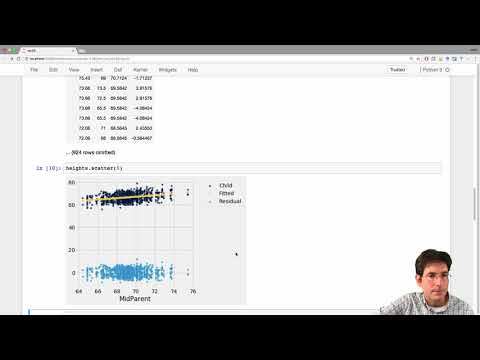

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('JlYcyQaxltc', width=800, height=300)

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [ ]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
)

In [ ]:
heights

In [ ]:
heights = heights.with_columns('Fitted', fitted_values(heights, 0, 1))
heights

In [ ]:
heights.scatter(0)

In [ ]:
def residuals(t, x, y):
    return t.column(y) - fitted_values(t, x, y)

In [ ]:
heights = heights.with_columns('Residual', residuals(heights, 'MidParent', 'Child'))
heights

In [ ]:
heights.scatter(0)

In [ ]:
def plot_residuals(t, x, y):
    with_residuals = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    with_residuals.select(x, y, 'Fitted').scatter(0)
    with_residuals.scatter(x, 'Residual')

In [ ]:
plot_residuals(heights, 'MidParent', 'Child')

## Regression Diagnostics

#### Watch Demo Video Below

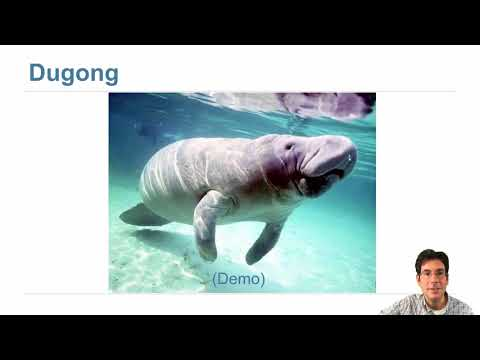

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('CiSYeEO-CBs', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

### Nonlinearity

In [ ]:
dugong = Table.read_table('dugong.csv')
dugong.show()

In [ ]:
correlation(dugong, 'Length', 'Age')

In [ ]:
plot_residuals(dugong, 'Length', 'Age')

In [ ]:
height_vs_average_weight = Table.read_table('us_women.csv')

In [ ]:
height_vs_average_weight

In [ ]:
correlation(height_vs_average_weight, 0, 1)

In [ ]:
plot_residuals(height_vs_average_weight, 0, 1)

### A Measure of Clustering

#### Watch Demo Video Below

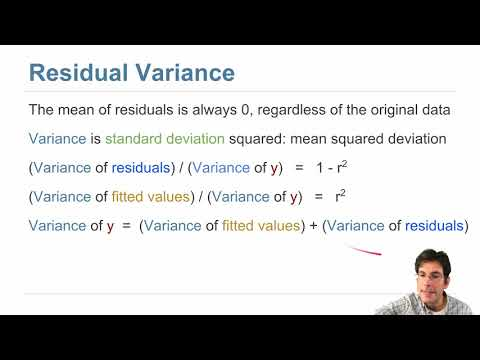

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('X7DLRL7JzMM', width=800, height=300)

In [ ]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

In [ ]:
plot_fitted(heights, 'MidParent', 'Child')

In [ ]:
correlation(heights, 'MidParent', 'Child')

In [ ]:
np.var(fitted_values(heights, 'MidParent', 'Child')) / np.var(heights.column('Child'))

In [ ]:
correlation(heights, 'MidParent', 'Child') ** 2

In [ ]:
np.std(fitted_values(heights, 'MidParent', 'Child')) / np.std(heights.column('Child'))

In [ ]:
correlation(dugong, 'Length', 'Age')

In [ ]:
np.std(fitted_values(dugong, 0, 1)) / np.std(dugong.column(1))

In [ ]:
plot_fitted(dugong, 'Length', 'Age')

In [ ]:
hybrid = Table.read_table('hybrid.csv')

In [ ]:
hybrid

In [ ]:
plot_fitted(hybrid, 'acceleration', 'mpg')

In [ ]:
correlation(hybrid, 'acceleration', 'mpg')

In [ ]:
np.std(fitted_values(hybrid, 3, 4)) / np.std(hybrid.column(4))

No matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of $y$. The fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

## SD of the Residuals

No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of $y$. The fraction is  $\sqrt{1-r^2}$.

$$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

#### Watch Demo Video Below

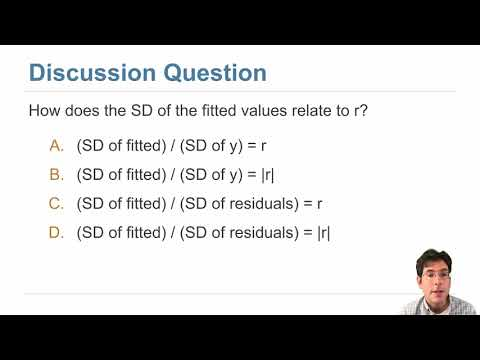

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('vYQ2EWvySV0', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [ ]:
np.std(residuals(heights, 'MidParent', 'Child'))

In [ ]:
r = correlation(heights, 'MidParent', 'Child')
r

In [ ]:
np.sqrt(1 - r**2) * np.std(heights.column('Child'))

In [ ]:
np.std(residuals(hybrid, 'acceleration', 'mpg'))

In [ ]:
r = correlation(hybrid, 'acceleration', 'mpg')
r

In [ ]:
np.sqrt(1 - r**2) * np.std(hybrid.column('mpg'))